<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/Project_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project:- Netflix Dataset

Importing Libraries

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df=pd.read_csv('/content/netflix_titles.csv',encoding='unicode_escape')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


##**Regarding Dataset**
About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Description of each column in the dataset:
**

- show_id: A unique identifier for each show or movie.

- type: The type of content, either "Movie" or "TV Show."

- title: The title of the movie or TV show.

- director: The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

- cast: The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

- country: The country where the movie or TV show was produced or is associated with.

- date_added: The date when the content was added to the streaming platform, in the format "Month Day, Year."

- release_year: The year the movie or TV show was originally released.

- rating: The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

- duration: The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

- listed_in: The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

description: A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

In [6]:
df.count()

,0
show_id,8807
type,8807
title,8807
director,6173
cast,7982
country,7976
date_added,8797
release_year,8807
rating,8803
duration,8804


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [8]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
df['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


###**Analyzing the Data**
Netflix Data Null Percentage Analysis

Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. the column names and their corresponding null percentages, making it easy to identify which columns have the most missing data.

In [10]:
null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


The high percentage of missing data in the "director" and "cast" columns may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete.

**Imputation of Missing Values in Netflix Dataset**

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [11]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    df[column].fillna("Unknown", inplace=True)


In [12]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [13]:
df.description

,description
0,"As her father nears the end of his life, filmm..."
1,"After crossing paths at a party, a Cape Town t..."
2,To protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo..."
4,In a city of coaching centers known to train I...
...,...
8802,"A political cartoonist, a crime reporter and a..."
8803,"While living alone in a spooky town, a young g..."
8804,Looking to survive in a world taken over by zo...
8805,"Dragged from civilian life, a former superhero..."


**Segmentation of Netflix Dataset into TV Shows and Movies**

The Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'type' column, which indicates whether a given entry is a "TV Show" or a "Movie."



In [14]:
tv_show = df[df['type']== 'TV Show']
movie = df[df['type']== 'Movie']

In [15]:
display(movie.head(4), '_')
display(tv_show.head(4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


'_'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
movies_df = df[df['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [17]:
len(df['listed_in'].unique())

514

In [18]:
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()
genre_counts

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


In [19]:
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


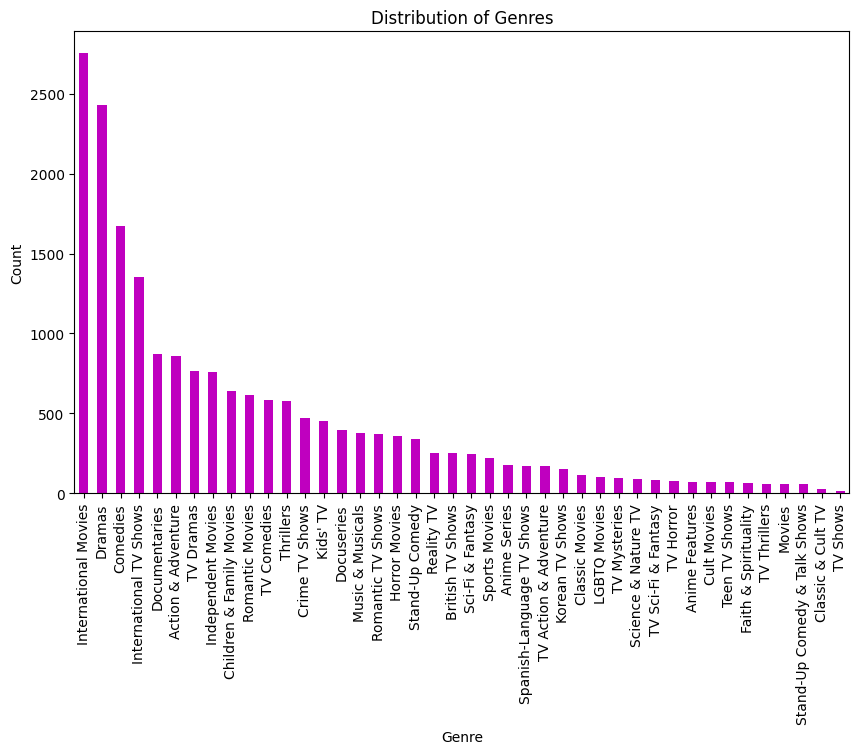

In [20]:
genre_counts.plot(kind='bar', figsize=(10, 6),color='m')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()


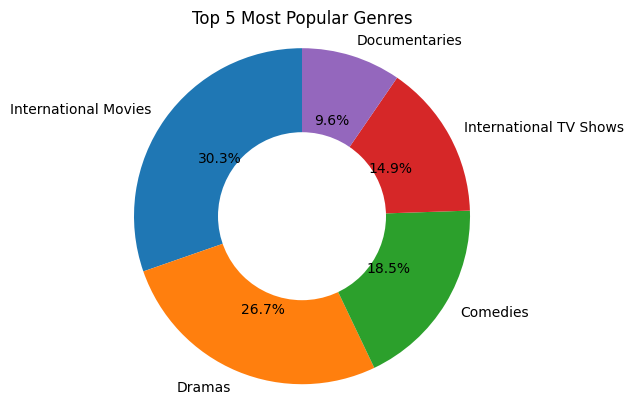

In [21]:
fig, ax = plt.subplots()
ax.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Top 5 Most Popular Genres')
plt.show()


In [22]:
comedian_movies = df[df['listed_in'] == 'Comedies']
comedian_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom","June 4, 2019",2009,R,94 min,Comedies,A journalist latches onto an unbelievable stor...
8433,s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",Unknown,"January 1, 2020",1991,PG-13,85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...
8536,s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,"December 12, 2017",2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...
8608,s8609,Movie,Total Frat Movie,Warren P. Sonoda,"Justin Deeley, Alex House, Steven Yaffee, Rebe...",United States,"December 19, 2016",2016,NR,94 min,Comedies,A disbanded fraternity tries to get their act ...


**Find Top most Actor**

Top 5 most popular genres:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


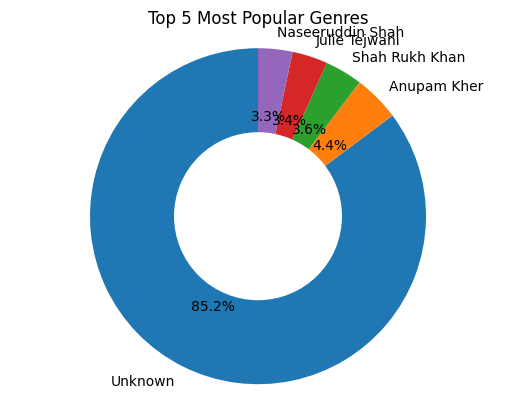

In [23]:
cast_counts = df['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)

top_5_cast.index = top_5_cast.index.str.replace('$', '\$')
print("Top 5 most popular genres:-", top_5_cast)

fig, ax = plt.subplots()
ax.pie(top_5_cast, labels=top_5_cast.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')

fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Top 5 Most Popular Genres')
plt.show()

In [24]:
recent_movie_data = df[['title', 'type', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

title                                                                                                                                              Dick Johnson Is Dead
type                                                                                                                                                              Movie
description    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Name: 0, dtype: object


##**Visualizing**

**Data Types Distribution in Netflix Dataset**

code generates a pie chart to visualize the distribution of data types within the Netflix dataset. Specifically, it provides insights into the number of columns in the dataset that belong to each data type category.



In [25]:
data_types_counts = df.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()

**Netflix Content Release Year Distribution**

generates a histogram using the Plotly Express library to visualize the distribution of Netflix content based on the release year. Each bar in the histogram represents the count of content items released in a particular year. The 'release_year' column from the Netflix dataset is used as the x-axis, and each bar's color represents the corresponding release year.

In [26]:
fig = px.histogram(df,x="release_year", title="release_year", color="release_year")
fig.update_layout(
    bargap=0.2
)
fig.show()

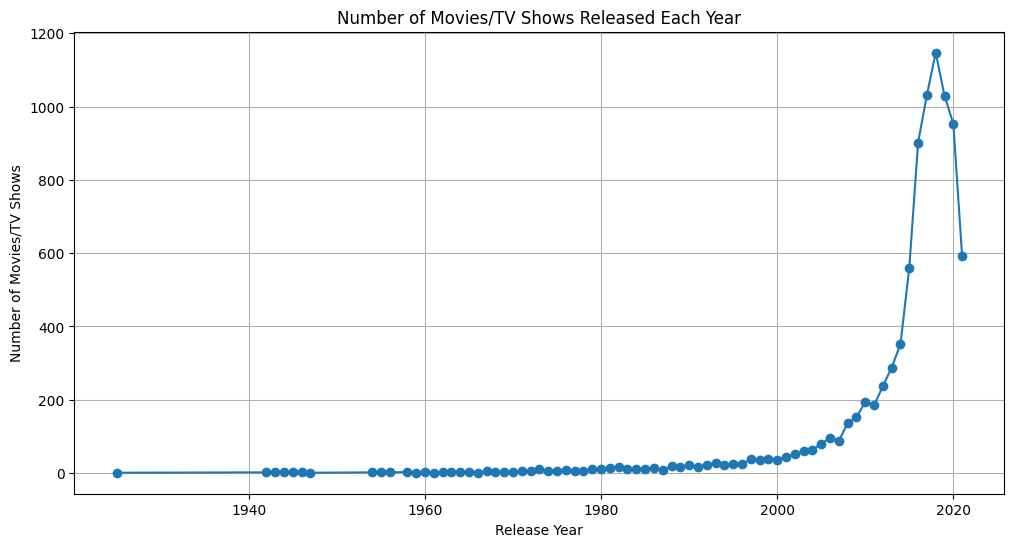

In [27]:
release_year_counts = df.groupby('release_year')['show_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Number of Movies/TV Shows Released Each Year')
plt.grid(True)
plt.show()

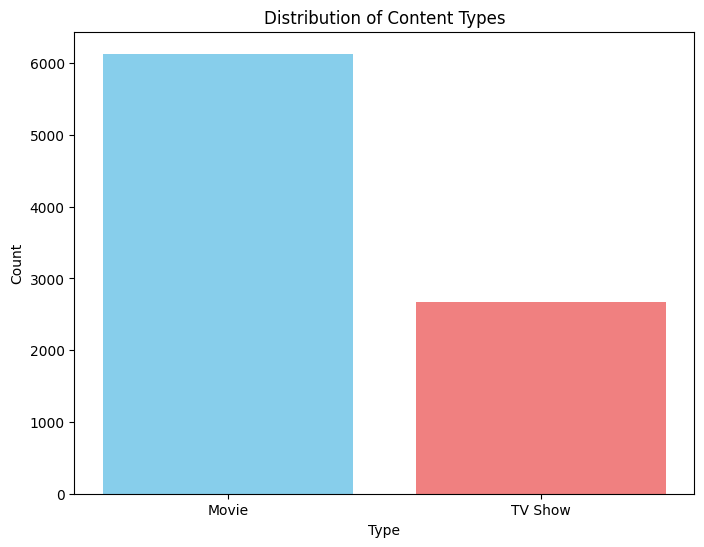

In [28]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()

**Distribution of Netflix Content by Country with Box Plot Marginals**

Creates a histogram plot using the Plotly Express library (px) to visualize the distribution of Netflix content by country. The 'country' column is used as the x-axis variable, and a histogram is constructed to show the frequency of content from different countries. Additionally, the plot includes box plot marginals, which display summary statistics (such as quartiles and outliers) for the distribution of content within each country.

In [29]:
ax = px.histogram(df,x="country",marginal="box",title="country")
ax.update_layout(bargap=0.2)

**Analysis of Netflix Content Categories**

performs an analysis of the content categories within the Netflix dataset. It aims to provide insights into the distribution and popularity of different content categories.

************************************************
 listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64 
************************************************


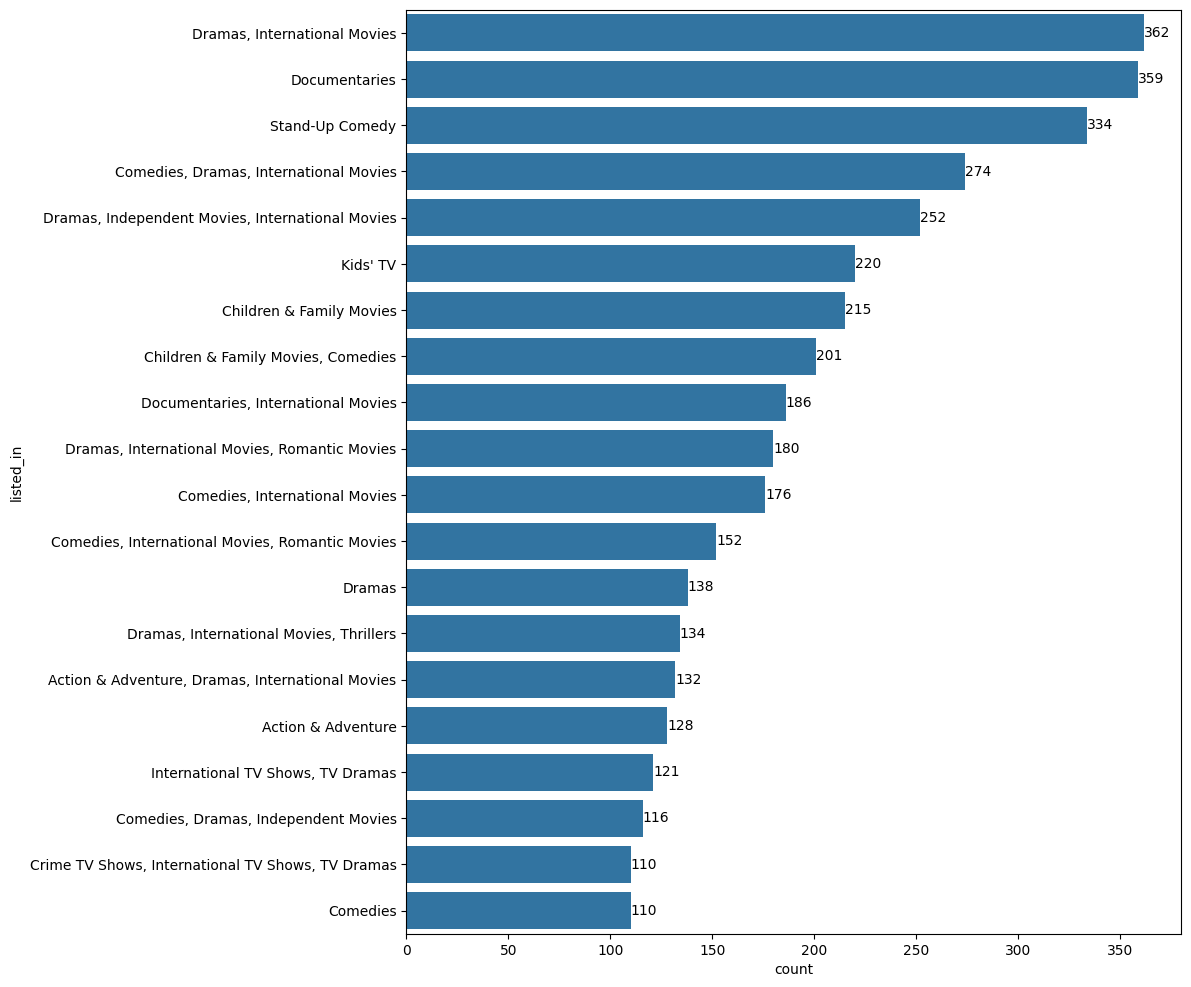

In [30]:
len(df['listed_in'].unique())
print('************************************************\n',df['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=df, y="listed_in", order=df['listed_in'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()

##Featuring
**Data Type Segmentation in the Netflix Dataset**

the Netflix dataset is segmented into three groups based on the data types of the columns:

In [31]:
int_col = df.select_dtypes(include=('int')).columns
str_col = df.select_dtypes(include=('object')).columns
flt_col = df.select_dtypes(include=('float')).columns

**EDA: Distribution of Integer Columns by Content Type**

an exploratory data analysis is performed to analyze the distribution of integer columns in a dataset, differentiating between "TV Shows" and "Movies" as content types. The code accomplishes the following:



Index(['release_year'], dtype='object')
['release_year']


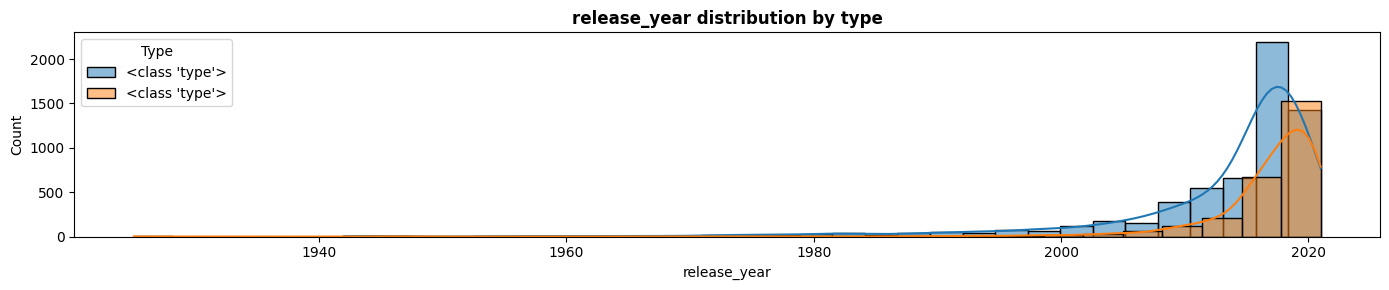

In [32]:
print(int_col)

# Remove 'id' from int_col and create a new list
int_col_without_id = [col for col in int_col if col != 'id']

# Print the updated list
print(int_col_without_id)

# Get the unique values of the 'outcome' column
unique_outcomes = df['type'].unique()

# Create subplots
plt.figure(figsize=(14, len(int_col_without_id) * 3))

for i, col in enumerate(int_col_without_id):
    plt.subplot(len(int_col_without_id), 1, i+1)

    for outcome in unique_outcomes:
        sns.histplot(data=df[df['type'] == outcome], x=col, bins=30, kde=True, label=type)

    plt.title(f"{col} distribution by type", fontweight="bold")
    plt.xlabel(col)
    plt.legend(title='Type')

plt.tight_layout()
plt.show()

**Netflix Content Rating Distribution**

the Plotly library to create a histogram visualization of the distribution of content ratings in the Netflix dataset. The 'rating' column is used as the variable of interest on the x-axis, and different content ratings are color-coded for visual distinction.

In [33]:
fig = px.histogram(df,x="rating", title="Rating", color="rating")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()